#**[Can Machine Learning Solve a Maze?](https://www.sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p008/artificial-intelligence/machine-learning-maze)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.





## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


##**Importing Libraries**
We will start this science project by importing some necessary libraries. These libraries contain functions that we will be using to create and display our maze. The comments tell you what each libary is for.

In [2]:
# Provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions
# We will be using this library to initialize our maze.
import numpy as np

# A 2D plotting library that enables users to create a wide variety of high-quality plots and visualizations.
# We will be using this library to display our maze in a visually appealing way.
import matplotlib.pyplot as plt

# A library that provides various functions for working with time-related operations. We will be using this library
# to give us time to look at how the agent is progressing through the maze
import time

print("You have imported all the libraries.")

You have imported all the libraries.


##**Creating the Maze Environment**

The code below sets up a simple maze with walls, a starting point (S), and a goal point (G). The maze is set up on a grid where each cell is either a 0 or 1, with 0 representing a black empty space and 1 representing a white wall. For your science project, you can use the sample maze we have provided, or change the code to make your own.

If you make your own maze follow these guidelines:
*   You can make it any size you want.
*   Make sure that the start and goal positions are located inside the maze and not on a wall.
*   Make sure your maze has a path from the start to the goal.


In [3]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze object with the provided maze, start_position, and goal position
        self.maze = maze
        self.maze_height = maze_layout.shape[0] # Get the height of the maze (number of rows)
        self.maze_width = maze_layout.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start_position    # Set the start position in the maze as a tuple (x, y)
        self.goal_position = goal_position      # Set the goal position in the maze as a tuple (x, y)

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')

        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()

print("This code block has been run and the Maze class is now available for use.")

This code block has been run and the Maze class is now available for use.


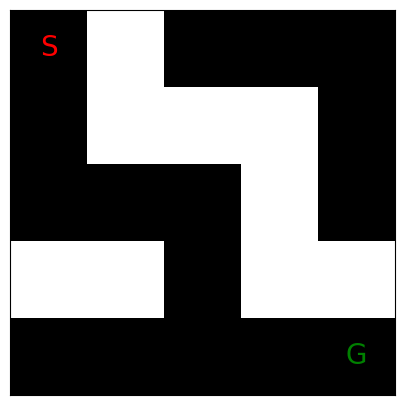

In [4]:
# Create any maze layout you'd like, here's an example
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 0), (4, 4))
# Visualize the maze
maze.show_maze()

##**Implementing the Agent**

The code below is for the agent. The agent can move in four directions: up, down, left, and right. You do not need to change this code for your engineering project. As a variation to the project, you can (with a little bit of python knowledge) try making changes to the learning and exploration rate work as a variation to the project.

In [5]:
# Actions the agent can take: Up, Down, Left, Right. Each action is represented as a tuple of two values: (row_change, column_change)
actions = [(-1, 0), # Up: Moving one step up, reducing the row index by 1
          (1, 0),   # Down: Moving on step down, increasing the row index by 1
          (0, -1),  # Left: Moving one step to the left, reducing the column index by 1
          (0, 1)]   # Right: Moving one step to the right, increasing the column index by 1

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        # where the rows represent states, columns represent actions, and the third dimension is for each action (Up, Down, Left, Right)
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4)) # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate          # Learning rate controls how much the agent updates its Q-values after each action
        self.discount_factor = discount_factor      # Discount factor determines the importance of future rewards in the agent's decisions
        self.exploration_start = exploration_start  # Exploration rate determines the likelihood of the agent taking a random action
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate using the given formula
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode): # State is tuple representing where agent is in maze (x, y)
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4) # Choose a random action (index 0 to 3, representing Up, Down, Left, Right)
        else:
            return np.argmax(self.q_table[state]) # Choose the action with the highest Q-value for the given state

    def update_q_table(self, state, action, next_state, reward):
        # Find the best next action by selecting the action that maximizes the Q-value for the next state
        best_next_action = np.argmax(self.q_table[next_state])

        # Get the current Q-value for the current state and action
        current_q_value = self.q_table[state][action]

        # Q-value update using Q-learning formula
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Update the Q-table with the new Q-value for the current state and action
        self.q_table[state][action] = new_q_value

print("This code block has been run and the QLearningAgent class is now available for use.")

This code block has been run and the QLearningAgent class is now available for use.


##**Defining the Reward System**

This code determines the values for the reward system. The reward system provides feedback to the agent in reinforcement learning.

Use these default settings to see how the agent performs when untrained, and when initially trained.  Then adjust the values and repeat the training and evalution steps outlines in the project idea.  Keep adjusting systematically until you have engineered the best possible reward system to have the AI learn to efficiently navigate a maze.

In [6]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

print("The reward system has been defined.")

The reward system has been defined.


## **Testing the Agent**

The code below tests how well the agent navigates the maze. It reports the total number of steps the agent took to get through the maze as well as the total reward the agent accumulated.

Every time you want to test the agent, run the function ten times.  Each time note the number of steps the agent used to travel between the start and the goal, as well as the total reward. Calculate the average steps and average reward across all ten test trials.

For your engineering project you will:
1. Test the agent before training.
2. Try solving the maze yourself by hand. What is the fewest number of steps you can take to solve the maze?
2. Test the agent after training with the default reward system values.
3. Make changes to the default reward system and test the agent.  You will repeat this until you have an agent who is learning very well.

In [7]:
# This function simulates the agent's movements in the maze for a single episode.

def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached the goal:
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(current_state)
            reward = step_penalty

        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1

        # Update the agent's Q-table if training is enabled
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

        # Move to the next state for the next iteration
        current_state = next_state

    # Return the cumulative episode reward, total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path

print("This code block has been run and the finish_episode function is now available for use.")

This code block has been run and the finish_episode function is now available for use.


Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> Goal!
Number of steps: 88
Total reward: -437


<Figure size 640x480 with 0 Axes>

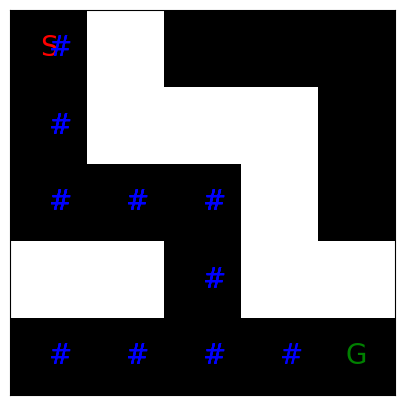

(88, -437)

In [8]:
# This function evaluates an agent's performance in the maze. The function simulates the agent's movements in the maze,
# updating its state, accumulating the rewards, and determining the end of the episode when the agent reaches the goal position.
# The agent's learned path is then printed along with the total number of steps taken and the total reward obtained during the
# simulation. The function also visualizes the maze with the agent's path marked in blue for better visualization of the
# agent's trajectory.

def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

Did you notice that the untrained agent takes *a lot* of steps? That is because the agent keeps backtracking and hitting walls. Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

##**Setting Up the Reinforcement Learning Loop**

Below is the code for Q-learning, a basic reinforcement learning algorithm. This is used to train the agent. This code updates the Q-values based on the rewards it receives during exploration.  You do not need to change this code for your engineering project.

In [9]:
def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

print("This code block has been run and the train_agent function is now available for use.")

This code block has been run and the train_agent function is now available for use.


##**Training the Agent**

The average reward is: 45.24
The average steps is: 16.79


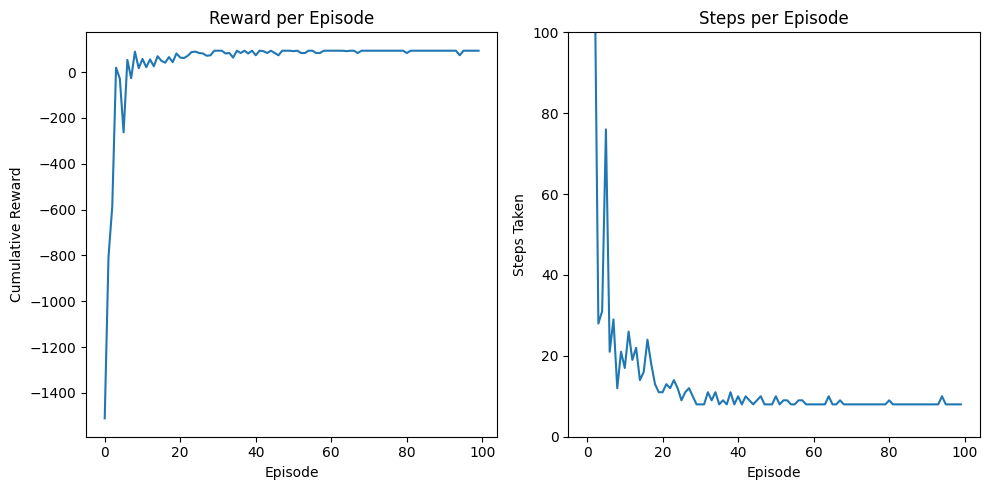

In [10]:
# Training the agent
train_agent(agent, maze, num_episodes=100)

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

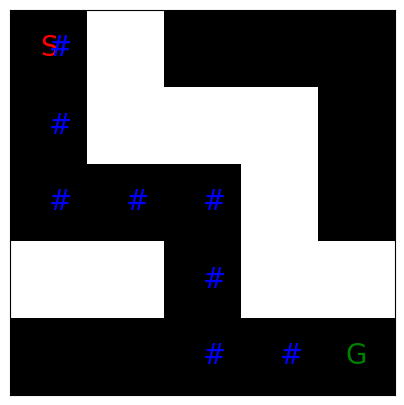

(8, 93)

In [11]:
# Testing the agent after training
test_agent(agent, maze, num_episodes=100)

## **Evaluating the Agent**

1. Test the agent again using the test_agent function. Run the code 10 times and note how many steps the agent takes to reach the goal. On average, how many steps does the agent take?
2. Does the agent consistently find the shortest path from the starting position to the goal?

## **Experimenting and Improving**

Try experimenting with a different reward system to see how that affects how the agent learns. Copy or run this cell multiple times, changing the goal reward from 0 to 1, 10, 20, 30, etc.. and to 100, and 1000.

The average reward is: -68.68
The average steps is: 19.01


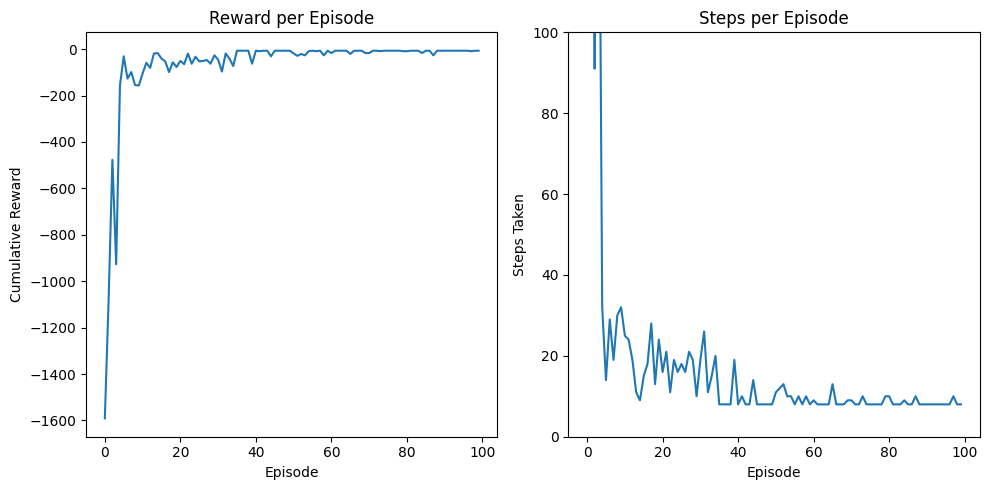

In [12]:
goal_reward = 0
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)

train_agent(agent, maze, num_episodes=100)

## **Variation: Creating More Mazes**

Create new mazes and test how well the agent performs in more complex mazes with multiple paths and dead ends

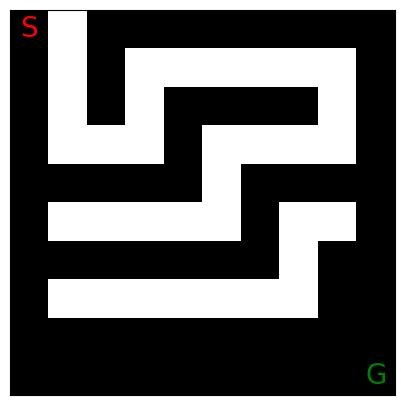

In [22]:
# Create any maze layout you'd like
maze_layout = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
                        [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
                        [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
                        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
                        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Create an instance of the maze and set the starting and ending positions
start_x = 0
start_y = 0
goal_x = 9
goal_y = 9
maze = Maze(maze_layout, (start_x, start_y), (goal_x, goal_y))
# Visualize the maze
maze.show_maze()

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 3)-> (0, 4)-> (0, 3)-> (0, 2)-> (0, 3)-> (0, 4)-> (0, 5)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 3)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 3)-> (0, 4)-> (0, 3)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 7)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 7)-> (0, 8)-> (1, 8)-> (2, 8)-> (1, 8)-> (2, 8)-> (1, 8)-> (1, 9)-> (1, 8)-> (0, 8)-> (0, 7)-> (0, 8)-> (0, 7)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 7)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (4, 4)-> (3, 4)-> (4, 4)-> (3, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (5, 2)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (5, 2)-> (4, 2)-> (5, 2)-> (4, 2)-> (5, 2)-> (4, 2)-> (4, 3)-> (4, 4)-> (3, 4)-> (2, 4)-> (3, 4)-> (4, 4)-> (3, 4)-> (2, 4

<Figure size 640x480 with 0 Axes>

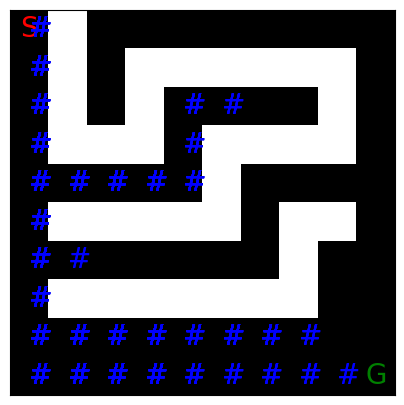

(815, -3685)

In [23]:

# Create the agent object
agent = QLearningAgent(maze)
# Test the agent using the test_agent function
test_agent(agent, maze)

The average reward is: -324.68
The average steps is: 109.32


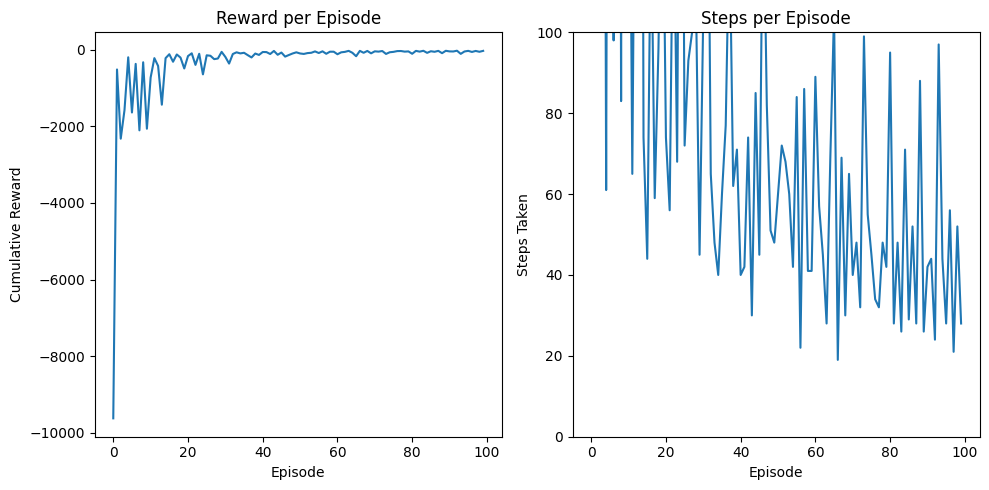

In [24]:
# Training the agent
train_agent(agent, maze, num_episodes=100)

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 3)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 3)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 3)-> (0, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (3, 4)-> (2, 4)-> (3, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (5, 2)-> (6, 2)-> (5, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (7, 2)-> (6, 2)-> (5, 2)-> (6, 2)-> (5, 2)-> (4, 2)-> (5, 2)-> (4, 2)-> (4, 3)-> (4, 2)-> (5, 2)-> (4, 2)-> (4, 3)-> (4, 4)-> (3, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (3, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (5, 2)-> (4, 2)-> (5, 2)-> (4, 2)-> (4, 3)-> (4, 2

<Figure size 640x480 with 0 Axes>

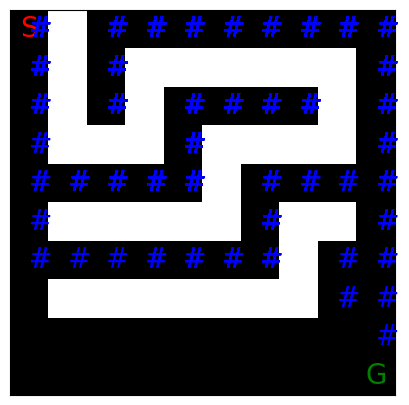

(2497, -14475)

In [25]:
# Testing agent again after training, feel free to run multiple times
test_agent(agent, maze)